<a href="https://colab.research.google.com/github/kdj0712/Learning/blob/main/docs/visuallizations/02_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글 폰트 설치

In [ ]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치한 이후 무조건 세션 다시 시작하기 필요

### MatPlotlib 설치

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

### 데이터 파일 로딩 및 데이터 프레임 확인

In [3]:
import pandas as pd

In [8]:
df_LCOCT = pd.read_csv('sample_data/LetalCarOfContractType.csv')

In [9]:
df_LCOCT[100:104]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
100,66437196,렌탈,Promotion,서비스 방문,2019-10-21,60,CMS,K3,90900,계약확정,0,없음,2.0,농협은행,정상,29.0,1259.0
101,66420849,렌탈,Promotion,서비스 방문,2019-10-21,60,CMS,K2,90900,계약확정,0,없음,3.0,외환은행,정상,NaN,NaN
102,66758580,렌탈,Package,서비스 방문,2019-10-21,60,CMS,K1,134700,계약확정,0,없음,2.0,국민은행,정상,57.0,2262.0
103,66282355,렌탈,Extension_Rental,서비스 방문,2019-10-21,60,CMS,K1,96900,계약확정,0,없음,1.0,우리은행,정상,61.0,2497.0


In [10]:
df_LCOCT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [11]:
df_LCOCT['id'].describe()

count    5.130400e+04
mean     6.266457e+07
std      1.216115e+07
min      2.568798e+07
25%      6.643149e+07
50%      6.676578e+07
75%      6.678161e+07
max      6.696986e+07
Name: id, dtype: float64

In [12]:
import seaborn as sns

### 단일변수 시각화

#### 수치형
- 히스토그램
- Boxplot : IQR(4분위 표시)

In [13]:
df_LCOCT.describe()

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.000000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.161040,3.428894,46.608285,1967.922412
std,1.216115e+07,12.010117,15305.147334,1.122356,2.213590,13.465977,436.707329
min,2.568798e+07,12.000000,54603.000000,-1.000000,0.000000,20.000000,872.000000
25%,6.643149e+07,60.000000,81900.000000,0.000000,1.000000,37.000000,1646.000000
50%,6.676578e+07,60.000000,96900.000000,0.000000,3.000000,46.000000,1946.000000
75%,6.678161e+07,60.000000,98400.000000,0.000000,5.000000,56.000000,2263.000000
max,6.696986e+07,60.000000,215700.000000,15.000000,10.000000,107.000000,3803.000000


<Axes: xlabel='age', ylabel='Count'>

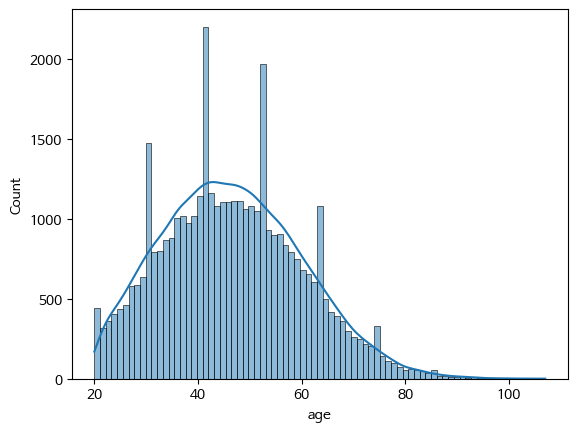

In [16]:
sns.histplot(df_LCOCT,x='age', kde=True)

<Axes: xlabel='age'>

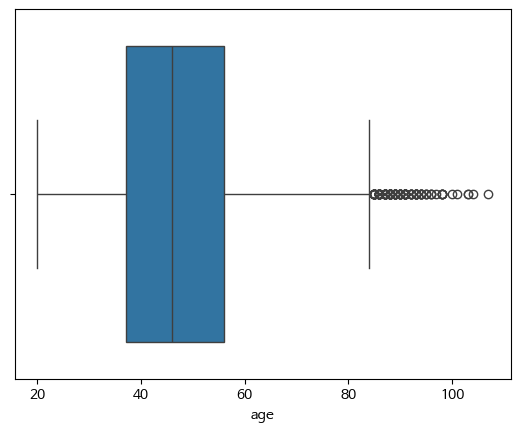

In [17]:
# histogram에서 이상 데이터로 의심되는 영역을 확인하는 작업을 진행(80세 이상에서 확인)
sns.boxplot(data=df_LCOCT,x='age')

#### *범주형*
- Bar chart = countplot

In [14]:
df_LCOCT.describe(include=object)

,type_of_contract,type_of_contract2,channel,datetime,payment_type,product,state,overdue,bank,cancellation
count,51300,51303,51304,51304,51304,51303,51304,51302,48544,51279
unique,2,9,20,101,5,6,4,2,46,2
top,렌탈,Promotion,서비스 방문,2019-10-29,CMS,K1,계약확정,없음,국민은행,정상
freq,46481,15811,15186,817,32825,39134,50350,49112,9901,50372


Text(0.5, 1.0, '계약 종류')

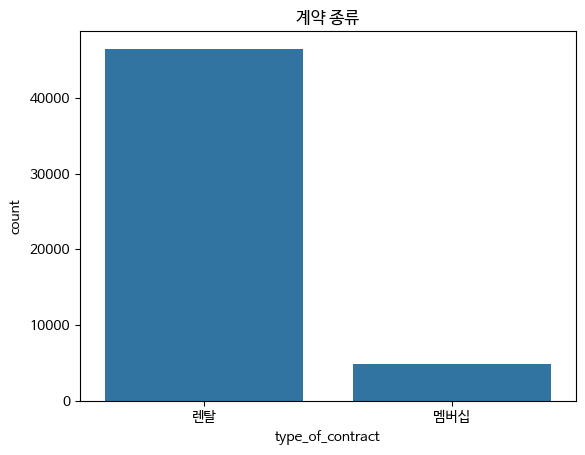

In [19]:
sns.countplot(data=df_LCOCT,x='type_of_contract')
plt.title("계약 종류")

Text(0.5, 1.0, '계약 유형')

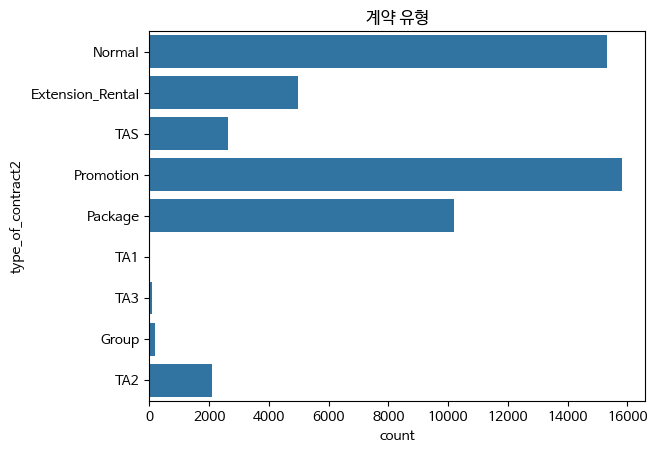

In [26]:
# sns.countplot(data=df_LCOCT,x='type_of_contract2')
sns.countplot(data=df_LCOCT,y='type_of_contract2')
plt.title("계약 유형")

### 다변수 시각화

<Axes: xlabel='type_of_contract2', ylabel='count'>

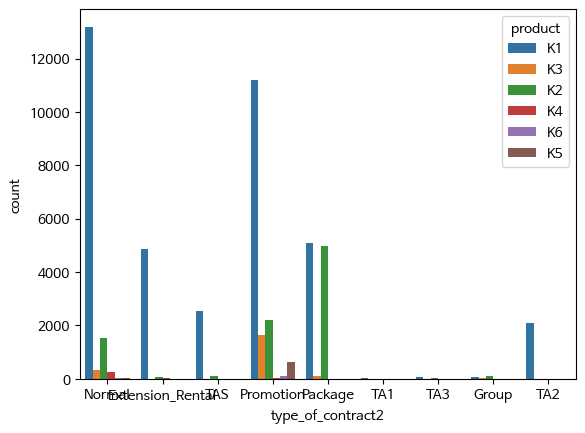

In [23]:
sns.countplot(data=df_LCOCT,x='type_of_contract2', hue='product')